In [1]:
import pandas as pd

In [48]:
train_data = pd.read_csv('../dataset/train.csv')


In [56]:
"""
The train_data has to be processed before any analysis, include discarding useless columns and clearing outliers.
The temperature column is almost same as the target column.
In fact, since there are only date and id columns in the test dataset,
I don't think it's necessary to evaluate the correspondence between target and (type, temperature)
""" 

train_data = train_data[['date', 'id', 'target']]
train_data.shape

(4312358, 3)

In [57]:
upper_threshold = train_data['target'].quantile(0.999)
lower_threshold = train_data['target'].quantile(0.001)
train_data = train_data[train_data['target'].between(lower_threshold, upper_threshold)]
train_data.shape

(4308073, 3)

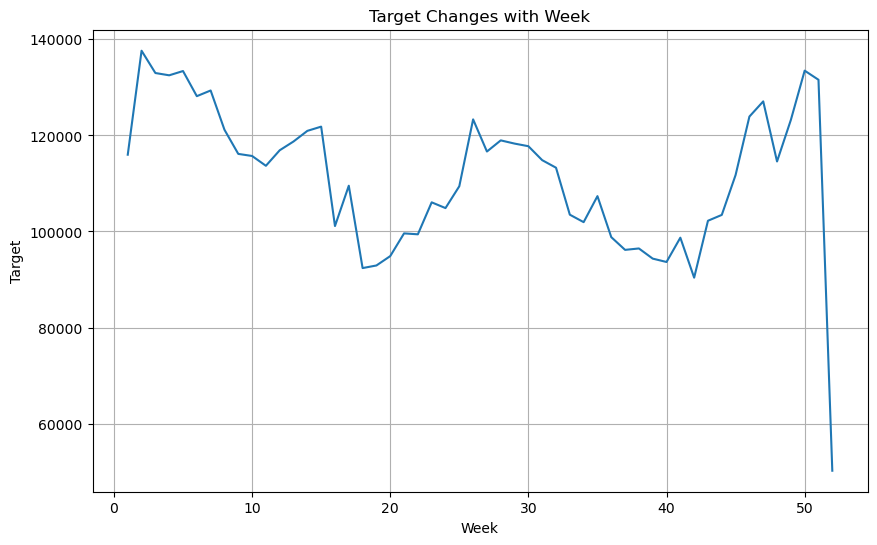

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "train_data"
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y%m%d%H')

# Extract week from the date column
train_data['week'] = ((train_data['date'].dt.dayofyear - 1) // 7) + 1

# Group by week and calculate the sum of target value
grouped_data = train_data.groupby('week')['target'].sum().reset_index()

# Plotting the target changes with week
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

plt.plot(grouped_data['week'], grouped_data['target'])
plt.xlabel('Week')
plt.ylabel('Target')
plt.title('Target Changes with Week')
plt.grid(True)
plt.show()

# The graph demonstrates the periodicity of power consumption